# create a separating line classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

the following dataset: separable.tsv.  Take a look at it, and plot
it.  Plot it in a way that $y$ has different color, depending on the
class (1 or 2).

In [3]:
# load training data
df = pd.read_table('../data/separable.tsv')
df.head()

         x1        x2  y
0  0.168042  0.281469  1
1  0.807516  0.786281  2
2  0.384942  0.173019  1
3  0.327734  0.570748  1
4  0.602101  0.419283  1

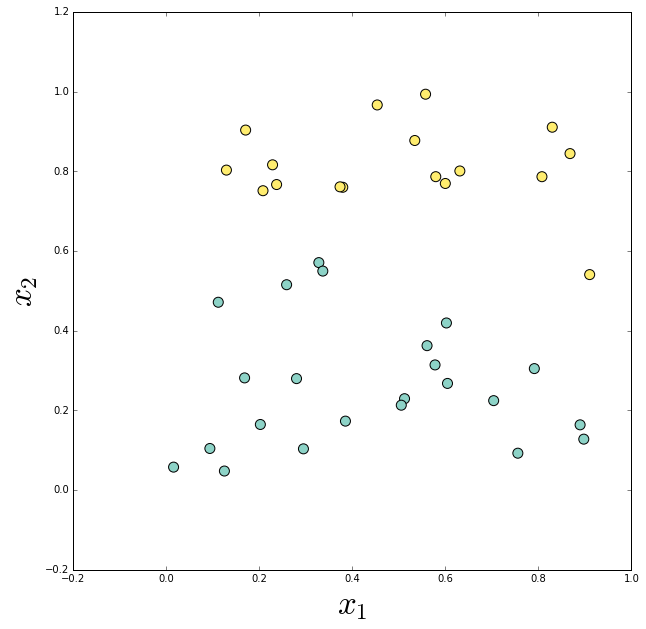

In [8]:
# plot training data
plt.figure(figsize=(10,10))
plt.scatter(df.x1, df.x2, c=df['y'], s=100, cmap=plt.cm.Set3)
plt.xlabel("$x_1$", fontsize=33)
plt.ylabel("$x_2$", fontsize=33)

## create and plot a line that separates different colors
You have to create at least two points of x1 (say 0 and 1), compute the
corresponding x2, and plot the line (use `plt.plot`).  Play with the
line intercept and slope parameters until you get a line that neatly
fits between the two different classes.

**NB!** compute the line by computing $x_2(x_1)$, don't just plot.


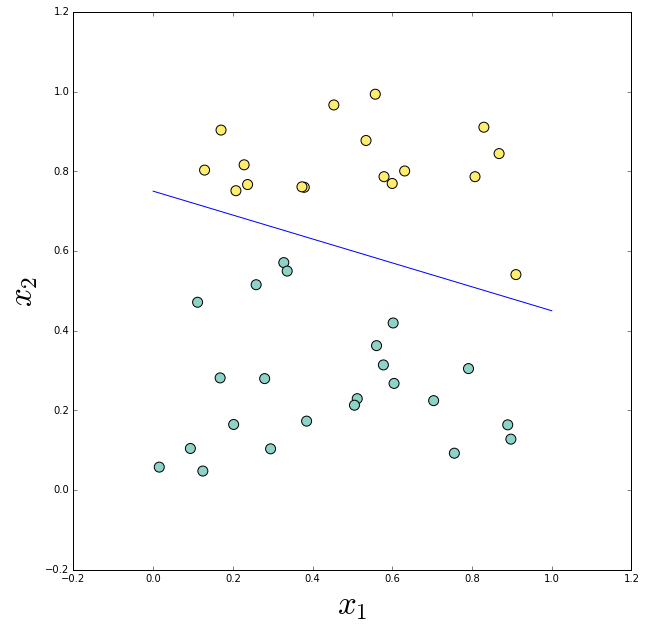

In [9]:
def line(a0, a1):
    x1 = [0, 1]
    x2 = [a0 + a1*x for x in x1]
    plt.plot(x1, x2)

plt.figure(figsize=(10,10))
plt.scatter(df.x1, df.x2, c=df['y'], s=100, cmap=plt.cm.Set3)
plt.xlabel("$x_1$", fontsize=33)
plt.ylabel("$x_2$", fontsize=33)
line(0.75, -0.3)

## Compute the (minimum) margin of the classifier based on your line

Margin is $|\beta_0 + \beta_1 x_1 + \beta_2 x_2|$.

Play a bit with the line parameters and try to get a larger margin.

0.06454547077883022

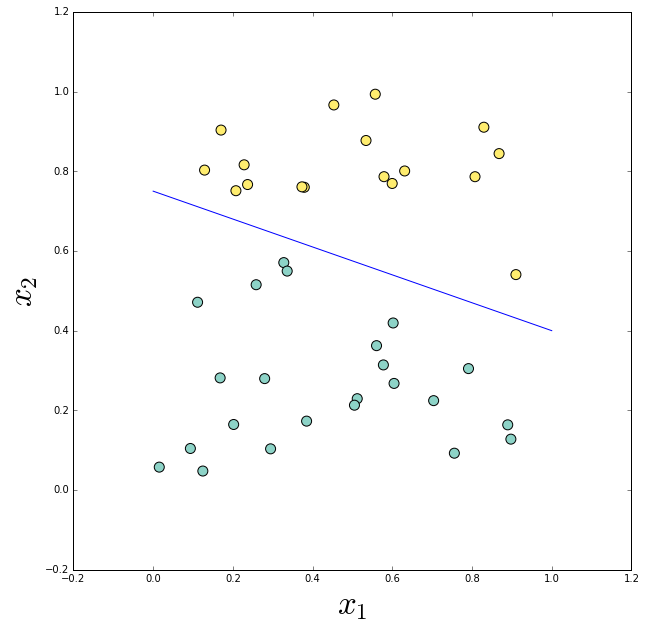

In [27]:
a0 = 0.75
a1 = -0.35
plt.figure(figsize=(10,10))
plt.scatter(df.x1, df.x2, c=df['y'], s=100, cmap=plt.cm.Set3)
plt.xlabel("$x_1$", fontsize=33)
plt.ylabel("$x_2$", fontsize=33)
line(a0, a1)

b0 = -a0
b1 = -a1
b2 = 1
M = np.abs(b0 + b1*df.x1 + b2*df.x2).min()
M

## Normalize the vector $\beta$

set $||\beta|| = 1$

In [22]:
beta = np.array([b0, b1, b2])
print(beta)
nb = np.linalg.norm(beta)
print("norm of beta:", nb)
betan = beta/nb

[-0.75  0.35  1.  ]
norm of beta: 1.298075498574717


## maximal margin classifier

Now use normalized beta.  Try to get maximal margin by playing around
with different component values of beta.  Normalize beta again as soon
as you change a value.

0.05386027978183361

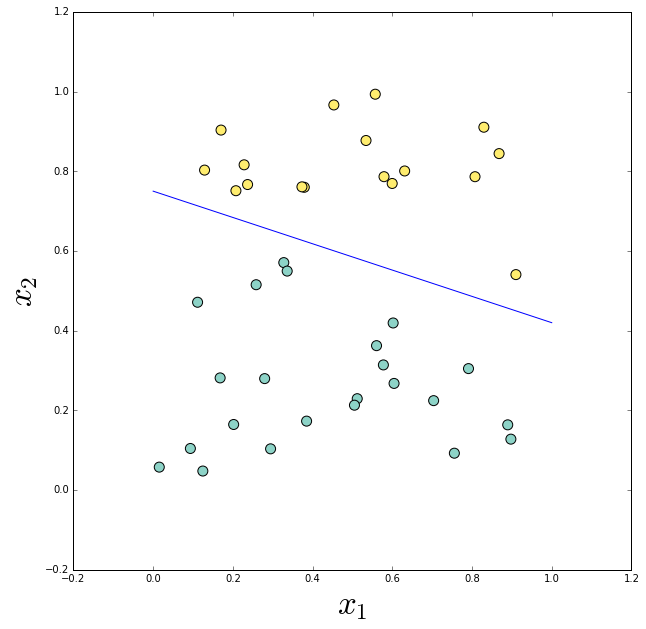

In [33]:
a0 = 0.75
a1 = -0.33
plt.figure(figsize=(10,10))
plt.scatter(df.x1, df.x2, c=df['y'], s=100, cmap=plt.cm.Set3)
plt.xlabel("$x_1$", fontsize=33)
plt.ylabel("$x_2$", fontsize=33)
line(a0, a1)

b0 = -a0
b1 = -a1
b2 = 1
bn = np.array([b0, b1, b2])
bn = bn/np.linalg.norm(bn)
M = np.abs(bn[0] + bn[1]*df.x1 + bn[2]*df.x2).min()
M